ID: tweetID

Tweet: Tweet by user

Sentiment: tone of user

Negative = 0

Neutral = 1

Positive = 2

Can’t tell = 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
train_data = pd.read_csv('F:\Data science\Practice dataset\mini_project 4.csv')
test_data = pd.read_csv('F:\Data science\Practice dataset\mini_project 4.csv')

In [3]:
train_data

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1
...,...,...,...
7269,3343,@mention Google plze Tammi. I'm in middle of ...,1
7270,5334,RT @mention ÷¼ Are you all set? ÷_ {link} ÷...,1
7271,5378,RT @mention Aha! Found proof of lactation room...,1
7272,2173,We just launched our iPad app at #SXSW! Get al...,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   7274 non-null   int64 
 1   tweet      7273 non-null   object
 2   sentiment  7274 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


In [5]:
# delete id column
train_data = train_data.drop('tweet_id', axis=1)
train_data.head()

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1


In [6]:
# changing the column order
column_order = ['sentiment', 'tweet']
train_data = train_data[column_order]

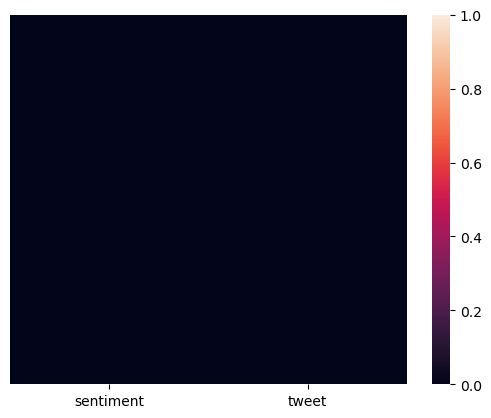

In [7]:
# checking correlation
sns.heatmap(train_data.isnull(), yticklabels = False)
plt.show()

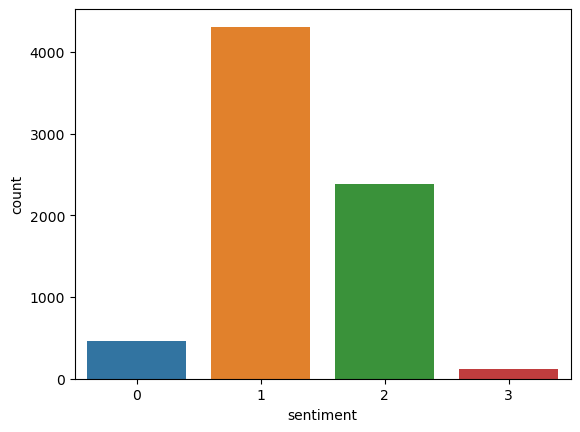

In [8]:
# observing the counting
sns.countplot(x = train_data['sentiment'])
plt.show()

In [9]:
# length
len(train_data)

7274

In [10]:
# changing the datatype of tweet column
train_data['tweet']= train_data['tweet'].astype(str)

In [11]:
# here we calculate the length of each element in particular column and storing the length in the list.
length = list()
for i in range(len(train_data)):
    length.append(len(train_data.iloc[i,1]))

In [12]:
#length = []
#for i in range(len(train_data)):
#    tweet_text = str(train_data.iloc[i, 1]) 
#    length.append(len(tweet_text))

In [13]:
# creating a new column 
train_data['length']= length

In [14]:
train_data.head()

,sentiment,tweet,length
0,1,#sxswnui #sxsw #apple defining language of tou...,89
1,1,Learning ab Google doodles! All doodles should...,143
2,2,one of the most in-your-face ex. of stealing t...,132
3,0,This iPhone #SXSW app would b pretty awesome i...,125
4,1,Line outside the Apple store in Austin waiting...,77


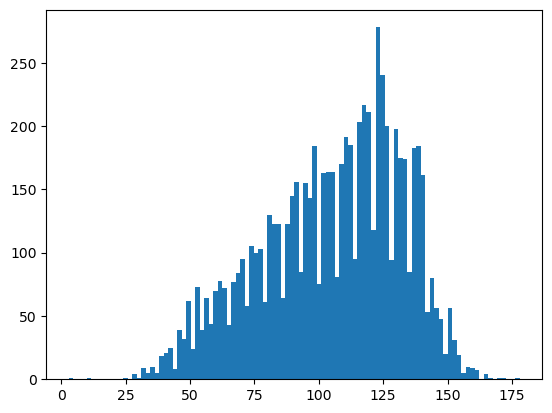

In [15]:
plt.hist(train_data['length'], bins = 100)
plt.show()

In [16]:
train_data.describe()

,sentiment,length
count,7274.000000,7274.000000
mean,1.299148,104.875309
std,0.607829,27.244936
min,0.000000,3.000000
25%,1.000000,86.000000
50%,1.000000,109.000000
75%,2.000000,126.000000
max,3.000000,178.000000


In [17]:
# shortest length data
train_data[train_data['length'] == min(train_data['length'])]['tweet'].iloc[0]

'nan'

In [18]:
# largest length data
train_data[train_data['length'] == max(train_data['length'])]['tweet'].iloc[0]

"\x8b\x81\xa0\x8bÄ_\x8bÛ\x81\x8bâ\x8f\x8b\x81Ü\x8bâ_\x8bâã\x8b\x81ª\x8b\x81ã\x95_\x81\x8bâ»\x8bÄ_\x8bâ_\x8bÄ\xa0\x8bâ£\x8bÄ_\x8b\x81Ç\x8fÁÎ\x8b\x81\x8d\x8b\x81Ù\x8b\x81ã\x8b\x81¬¾Û\x9d\x8bâ\x8f\x8b\x81»\x8b\x81ã\x8b\x81Ô\x8b\x81©\x8bÛâRT @mention Get a look at #SXSW's rumored #Apple &quot;pop-up&quot; store in Austin: {link}"

In [19]:
# average lenth data
train_data[train_data['length'] == 109]['tweet'].iloc[0]

'And @mention opens with some tech talk on the Apple store and whore PCs. right crowd, they dig! -carrie #sxsw'

In [20]:
# assigning values 
Negative = train_data[train_data['sentiment'] == 0]

In [21]:
Negative.describe()

,sentiment,length
count,456.0,456.000000
mean,0.0,108.923246
std,0.0,27.681640
min,0.0,38.000000
25%,0.0,90.000000
50%,0.0,114.000000
75%,0.0,132.000000
max,0.0,158.000000


In [22]:
Neutral = train_data[train_data['sentiment'] == 1]

In [23]:
Positive = train_data[train_data['sentiment'] == 2]

In [24]:
Cant_tell = train_data[train_data['sentiment'] == 3]

In [25]:
Positive

,sentiment,tweet,length
2,2,one of the most in-your-face ex. of stealing t...,132
8,2,Free #SXSW sampler on iTunes {link} #FreeMusic,46
9,2,I think I might go all weekend without seeing ...,79
11,2,It's official! I'm buying an iPad. #SXSW #elevate,49
12,2,"They're giving away iPad 2's, x boxes and book...",75
...,...,...,...
7261,2,The new Whrrl app is now live in the iPhone ap...,140
7263,2,There are two apple stores in ATX!! RT @mentio...,138
7265,2,"At #SXSW, Apple schools the marketing experts ...",86
7266,2,@mention great stuff on Fri #SXSW: Marissa May...,129


In [26]:
from wordcloud import WordCloud

In this the size of each word indicates its frequency or importance within the text.

Word clouds are often used for data visualization purposes to quickly grasp the most common words in a text or a dataset. 

In [27]:
# it extracts the values from 'tweet' column and converts them into a Python list named sentences. 
#Each element of the list represents a sentence from the 'tweet' column.
sentences = train_data['tweet'].tolist()

In [28]:
combined_sentences = " ".join(sentences)

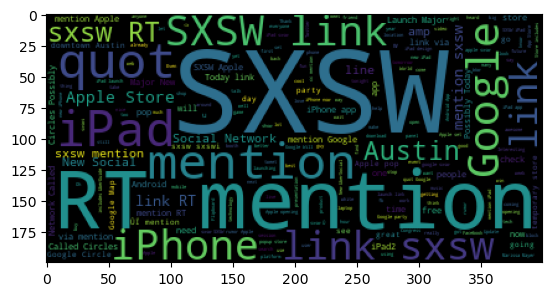

In [29]:
plt.imshow(WordCloud().generate(combined_sentences))
plt.show()

In [30]:
negative_sentences = Negative['tweet'].tolist()

In [31]:
combined_negative_sentences = " ".join(negative_sentences)

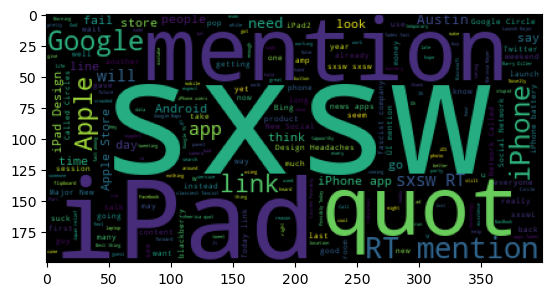

In [32]:
plt.imshow(WordCloud().generate(combined_negative_sentences))
plt.show()

### cleaning data

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
import nltk

In [35]:
import re
from nltk.stem import WordNetLemmatizer
lemmatizer = nltk.WordNetLemmatizer()

In [36]:
from nltk.tokenize import word_tokenize

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\india\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\india\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\india\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords

In [40]:
st = (stopwords.words('english'))
st.append("and")

In [41]:
# to convert a collection of text documents into a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vectorizer = CountVectorizer()

In [43]:
#def clean_text(text):
#    text = re.sub(r'http\S+', '', text)  # Remove URLs
#    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
#    text = text.strip()  # Remove leading/trailing whitespace
#    return text

In [44]:
#train_data_clean = [clean_text(text) for text in train_data]

In [45]:
#def message_cleaning(message):
#    test_punc_removed = [char for char in message if char not in string.punctuation]
#    test_punc_removed = ''.join(test_punc_removed)
#    test_punc_st_removed = []
#    for char in test_punc_removed.split():
#        if char.lower() not in st:
#            test_punc_st_removed.append(char)
#    test_punc_st_removed = " ".join(test_punc_st_removed)  
#    return test_punc_st_removed

In [46]:
#train_data_clean = train_data['tweet'].apply(message_cleaning)

In [47]:
# Combine the cleaning functions
def preprocess_text(text):
    # Clean the text by removing URLs and non-alphabetic characters
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.strip()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and perform lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in st]
    
    # Join tokens back into text
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [48]:
# Apply preprocessing to text data
#train_data_clean = [preprocess_text(text) for text in train_data]

In [49]:
train_data_clean = train_data['tweet'].apply(preprocess_text)

In [50]:
train_data['tweet'][5]

'#technews One lone dude awaits iPad 2 at Apple\x89Ûªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech'

In [51]:
train_data_clean[5]

'technews One lone dude awaits iPad Apples SXSW store link TechNews Apple iPad SXSW tablet tech'

In [52]:
data = train_data_clean.tolist()

In [53]:
#fit_transform method first learns the vocabulary from the provided text data and then transforms the text data into a matrix of counts.
tweets_countvectorizer = CountVectorizer().fit_transform(data).toarray()

In [54]:
tweets_countvectorizer.shape

(7274, 8848)

In [55]:
X = tweets_countvectorizer
y = train_data['sentiment']

# Naive Bayes 

In [56]:
X.shape

(7274, 8848)

In [57]:
y.shape

(7274,)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [60]:
# for discrete values
from sklearn.naive_bayes import MultinomialNB

In [61]:
NB_classifier = MultinomialNB()

In [62]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [63]:
y_pred = NB_classifier.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [65]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  7,  60,  32,   1],
       [ 21, 686, 174,   2],
       [  5, 197, 250,   0],
       [  2,  13,   5,   0]], dtype=int64)

<Axes: >

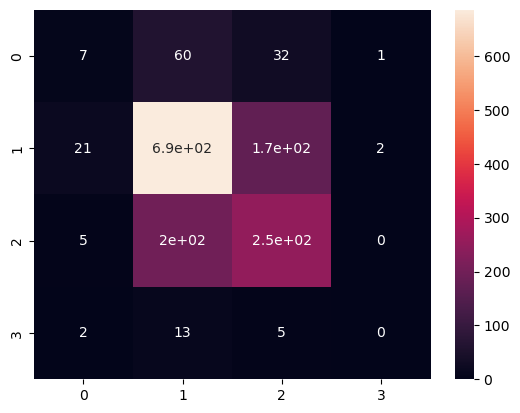

In [66]:
sns.heatmap(cm, annot = True)

Negative = 0

Neutral = 1

Positive = 2

Can’t tell = 3

In [67]:
# checking accuracy
ac = accuracy_score(y_test, y_pred)
ac

0.6481099656357389

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.07      0.10       100
           1       0.72      0.78      0.75       883
           2       0.54      0.55      0.55       452
           3       0.00      0.00      0.00        20

    accuracy                           0.65      1455
   macro avg       0.36      0.35      0.35      1455
weighted avg       0.62      0.65      0.63      1455

